In [24]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)

    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [10]:
reviews[0]

'✅ Trip Verified | Our flight started in Seattle Wa heading to Lisbon Portugal. After a 10 hour flight and a 2 hour layover we boarded flight BA502 to Lisbon. After heading to the runway the plane stopped and the pilot said we have a small mechanical issue and a mechanic is in route. After an hour in the tarmac the flight crews announce they were going to offer complimentary WATER? Really!! Another half hour goes by and they say the flight is cancelled, no reason at that time. As we wait for a bus to remove all passengers from the plane they announce that there will be staff members back at the gate to help with meal vouchers, taxi rides and hotel accommodations. WHAT? We get off the bus and there is a line of passengers trying to figure out what’s happening. Staff hands my wife and I a $10 meal voucher and says go upstairs and someone will help you with your issues. We go upstairs and nobody knows what to do. One staff member hands us a paper for a hotel room and tells us to get your 

In [20]:
cleaned_reviews = []
for review in reviews:
    cleaned_review = re.sub(r'^.*\|', '', str(review)).strip()
    cleaned_reviews.append(cleaned_review)

In [23]:
df = pd.DataFrame()
df['reviews'] = cleaned_reviews
df.head()

,reviews
0,Our flight started in Seattle Wa heading to Li...
1,British Airways Flight from Edinburgh got dela...
2,British Airways World Traveller Plus (Premium ...
3,BA is barely a step above low cost airlines. T...
4,Happy with the flight crew. Hadn't been on a p...


In [27]:
lm = WordNetLemmatizer()

In [28]:
def transformation(df_column):
  output = []
  for i in df_column:
    new_text = re.sub('[^a-zA-Z]',' ',str(i))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))
  return output

In [35]:
var = transformation(df.reviews)

In [36]:
var[0]

'flight started seattle wa heading lisbon portugal hour flight hour layover boarded flight ba lisbon heading runway plane stopped pilot said small mechanical issue mechanic route hour tarmac flight crew announce going offer complimentary water really another half hour go say flight cancelled reason time wait bus remove passenger plane announce staff member back gate help meal voucher taxi ride hotel accommodation get bus line passenger trying figure happening staff hand wife meal voucher say go upstairs someone help issue go upstairs nobody know one staff member hand u paper hotel room tell u get luggage keep receipt taxi reimbursed nothing else asked another flight said contact asap contact walked away grabbed luggage headed taxi line driven hotel receive email flight next day different airline iberian assigned seat together get hotel barely fit shower double bed lb wife crazy get little sleep nothing eat another taxi ride airport tried use meal voucher good prior day went first custo

In [37]:
df['lemma'] = var

In [38]:
df.head()

,reviews,lemma
0,Our flight started in Seattle Wa heading to Li...,flight started seattle wa heading lisbon portu...
1,British Airways Flight from Edinburgh got dela...,british airway flight edinburgh got delayed h ...
2,British Airways World Traveller Plus (Premium ...,british airway world traveller plus premium ec...
3,BA is barely a step above low cost airlines. T...,ba barely step low cost airline try dime nicke...
4,Happy with the flight crew. Hadn't been on a p...,happy flight crew plane year stressed made com...


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_compound_score(review_text):
    sentiment_scores = analyzer.polarity_scores(review_text)
    return sentiment_scores['compound']

df['Sentiment'] = df['lemma'].apply(get_vader_compound_score)

def classify_sentiment(compound_score):
    if compound_score >= 0.5:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(classify_sentiment)

In [41]:
df.head()

,reviews,lemma,Sentiment,Sentiment_Label
0,Our flight started in Seattle Wa heading to Li...,flight started seattle wa heading lisbon portu...,0.8660,Positive
1,British Airways Flight from Edinburgh got dela...,british airway flight edinburgh got delayed h ...,0.5200,Positive
2,British Airways World Traveller Plus (Premium ...,british airway world traveller plus premium ec...,0.9747,Positive
3,BA is barely a step above low cost airlines. T...,ba barely step low cost airline try dime nicke...,-0.4445,Negative
4,Happy with the flight crew. Hadn't been on a p...,happy flight crew plane year stressed made com...,0.9100,Positive


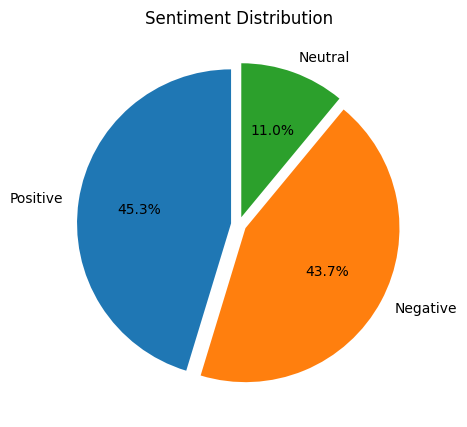

In [51]:
import matplotlib.pyplot as plt

df.Sentiment_Label.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05),
    figsize=(5, 5),
    labels=['Positive', 'Negative', 'Neutral']
)

plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


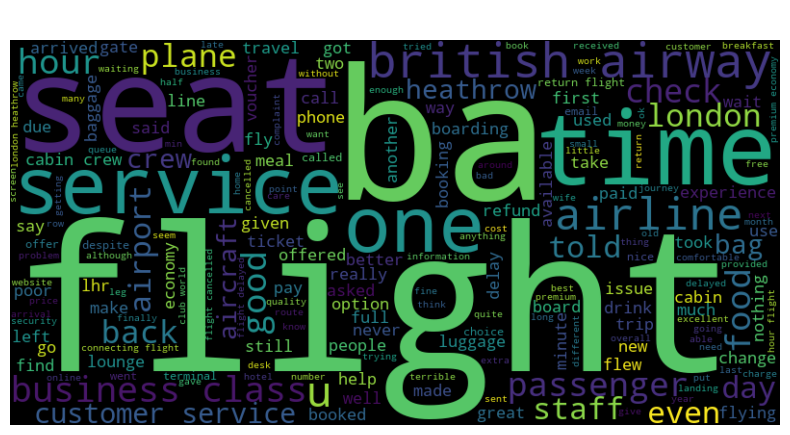

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['lemma'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    contour_color='white',
    contour_width=1
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airline Reviews', fontsize=20, color='white')
plt.show()
